In [2]:
#Paqueterias
import numpy as np
import matplotlib.pyplot as plt
import numpy.polynomial.chebyshev as cheb
from sympy import symbols, chebyshevt, expand



In [ ]:
# Datos proporcionados
f_x = np.array([-4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5])
f_y = np.array([55.5, 43.25, 32.5, 23.25, 15.5, 9.25, 4.5, 1.25, -0.5, -0.75, 0.5, 3.25, 7.5, 13.25, 20.5, 29.25, 39.5, 51.25, 64.5])

In [ ]:

# Normalizar x en el rango [-1, 1] para Chebyshev
x_min, x_max = np.min(f_x), np.max(f_x)
x_scaled = 2 * (f_x - x_min) / (x_max - x_min) - 1

# Chebyshev
def chebyshev_fit(x, y, degree):
    N = len(x)
    T = np.array([cheb.chebvander(x, degree)])  # Matriz de polinomios de Chebyshev
    T = T.reshape(N, degree + 1)
    coeffs = np.linalg.lstsq(T, y, rcond=None)[0]  # Resolver sistema lineal por mínimos cuadrados
    return coeffs

# Ajustar polinomio de Chebyshev de grado 5
coeffs = chebyshev_fit(x_scaled, f_y, 5)

In [6]:

# Generar expresión simbólica del polinomio de Chebyshev
x = symbols('x')
cheb_poly = sum(coeffs[i] * chebyshevt(i, x) for i in range(len(coeffs)))
cheb_poly_expanded = expand(cheb_poly)

# Imprimir el polinomio generado
print("Polinomio de Chebyshev de grado 5:")
print(cheb_poly_expanded)



Polinomio de Chebyshev de grado 5:
-8.01456640413551e-14*x**5 + 6.0529095522005e-14*x**4 + 7.48743796507448e-14*x**3 + 60.75*x**2 + 4.49999999999998*x - 0.749999999999982


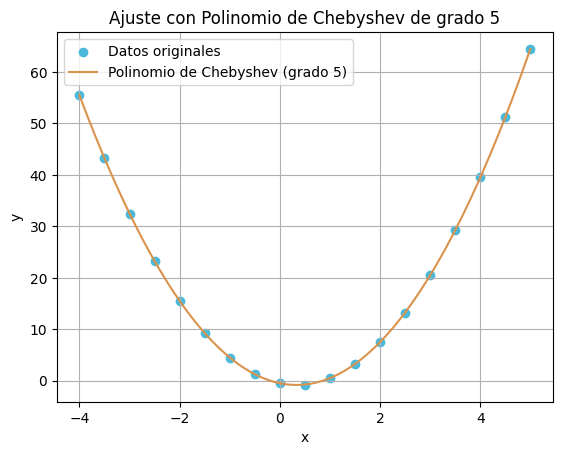

In [14]:
# Generar valores para graficar
x_plot = np.linspace(-1, 1, 100)
y_plot = cheb.Chebyshev(coeffs)(x_plot)

# Transformar x de nuevo a su escala original
x_real = (x_plot + 1) * (x_max - x_min) / 2 + x_min

# Graficar
plt.scatter(f_x, f_y, color='#4DB9DA', label='Datos originales')
plt.plot(x_real, y_plot, label='Polinomio de Chebyshev (grado 5)', color='#DA934D')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.title('Ajuste con Polinomio de Chebyshev de grado 5')
plt.show()

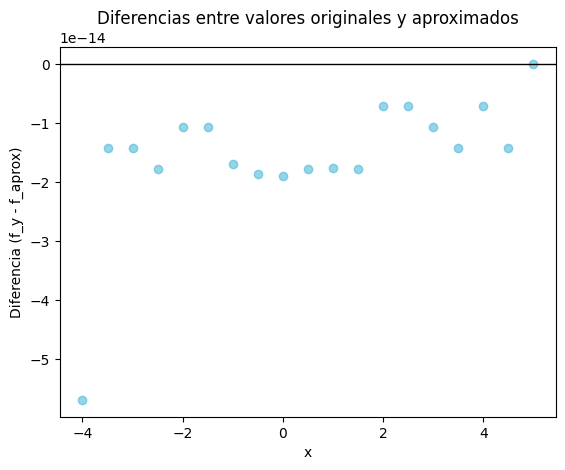

In [28]:
# Graficar diferencias sin traslapar
plt.scatter(f_x, differences, color='#4DB9DA', alpha=0.6)
plt.axhline(0, color='black', linewidth=1)
plt.xlabel('x')
plt.ylabel('Diferencia (f_y - f_aprox)')
plt.title('Diferencias entre valores originales y aproximados')
plt.grid(False)
plt.show()